Ονομ/νυμο: **Βασιλική Παπαγεωργίου-Τσακανικα**   ΑΜ: **03116673**

# Μέρος 2. Kaggle dataset (CS:GO Round Winner Classification)




## Σύντομη παρουσίαση: 


Το Data Set "CS:GO Round Winner Classification" περιέχει δεδομένα ενός αγώνα του παιχνιδιού CS:GO "τραβηγμένα"(snapshot) σε μια τυχαία στιγμή στην διάρκεια ενός round. <br>

Η κάθε κολώνα περίεχει ενα feature του dataset εκτός της τελευταιάς κολώνας στην οποία βρίσκονται οι κλάσεις. Τα features είναι όλα όσα κρίνουν τον νικητή ενος γύρου του παιχνιδίου, όπως αν έχει γίνει plant η βόμβα, πόσος χρόνος μένει, τι όπλα έχουν οι παίκτες και άλλα.<br>

* Πλήθος δειγμάτων: 122410
* Πλήθος χαρακτηριστικών: 96
* Είδος χαρακτηριστικών: Ακέραιοι (Integers), Χαρακτήρες(strings) και boolean.
* Μη διατεταγμένα χαρακτηριστικά: Οχι

Υπάρχουν επικεφαλίδες στο dataset αλλά όχι αρίθμηση γραμμών. <br>

Οι ετικέτες των κλάσεων βρίσκονται στην τελευταία κολώνα των δεδομένων (με αρίθμηση από το μηδέν στη θέση 97) και είναι οι εξής: 

1. CT
2. T

Έχουμε, λοιπόν, ένα binary set το οποίο ουσιαστικά μας δηλώνει τον νικητή ενός γύρου του παιχνιδιού(round_winner). 


### Full Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csgo = pd.read_csv("csgo_round_snapshots.csv", header=0)
csgo.head()

print('The csgo has a shape of:', csgo.shape,'\n')  #whole csgo shape

labels_cs = csgo.iloc[:, [96]] # τα labels(round_winner) είναι στη 97 κολώνα
features_cs = csgo.iloc[:, 0:96] #ta features

print('The headings for the features are:')
print(features_cs.head(),'\n')
print('The heading for the binary classification column is:')
print(labels_cs.head()) 


The csgo has a shape of: (122410, 97) 

The headings for the features are:
   time_left  ct_score  ...  ct_grenade_decoygrenade t_grenade_decoygrenade
0     175.00       0.0  ...                      0.0                    0.0
1     156.03       0.0  ...                      0.0                    0.0
2      96.03       0.0  ...                      0.0                    0.0
3      76.03       0.0  ...                      0.0                    0.0
4     174.97       1.0  ...                      0.0                    0.0

[5 rows x 96 columns] 

The heading for the binary classification column is:
  round_winner
0           CT
1           CT
2           CT
3           CT
4           CT


>Αφού χωρίσαμε τις κλάσεις και τα features στο δοθέν dataset  παρατηρήσαμε πως κάποια από αυτά τα δεδομένα είναι σε μορφή κειμένου(string), πράγμα που κάνει πιο περίπλοκη την επεξεργασία των δεδομένων. 

>  Έτσι, τα δεδομένα που μας επηρέαζαν, δηλαδή (map, Bomb Planted, round_winner) τα αντικαταστήσαμε με int values, με την βοήθεια της συνάρτησης replace, ώστε να μπορούμε πιο ευκολα να δουλέψουμε με τα δεδομένα μας χωρίς να επηρεάστει το dataset. 

>Επίσης, μπορέσαμε να εντοπίσουμε ποια features περιέχουν μόνο μηδενικές τιμές ώστε να τα αφαιρέσουμε από το dataset καθώς μας ήταν αδιάφορα για την συνέχεια της εργασίας.

> Παρακάτω λοιπόν φαίνεται η διαδικασία που ακολουθήσαμε:



In [ ]:
x=labels_cs.replace(to_replace='CT', value='0', regex=True)
labels_csnew = x.replace(to_replace='T', value='1', regex=True)     #εδω εκανα μια πατεντα για να αλλαξω ολες τις τιμες που ηταν strings σε τιμες ωστε να τις περασει το προγραμμα χωρις προβλημα

a=features_cs.replace(to_replace='de_dust2', value='1', regex=True)
b=a.replace(to_replace='de_train', value='2', regex=True)
c=b.replace(to_replace='de_nuke', value='3', regex=True)
d=c.replace(to_replace='de_overpass', value='4', regex=True)
e=d.replace(to_replace='de_vertigo', value='5', regex=True)
f=e.replace(to_replace='de_mirage', value='6', regex=True)
g=f.replace(to_replace='de_inferno', value='7', regex=True)
h=g.replace(to_replace='de_cache', value='8', regex=True)

i=h.replace(to_replace='False', value='0', regex=True)
features_csnew = i.replace(to_replace='True', value='1', regex=True)

Τέλος κάναμε split τα δεδομένα μας σε train και test με αναλογία 70-30 αντίστοιχα. Αυτό το επιλέξαμε καθώς τo dataset μας ήταν μεγάλο σε μέγεθος και το 70% των δεδομένων θα ήταν αρκετό για να κάνουμε train τους ταξινομητές μας.  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_csnew, labels_csnew, test_size=0.3)

#print(X_test)
#print(y_test)

### Απουσιάζουσες τιμές χαρακτηριστικών

Επειδή τα datasets δημιουργούνται από μετρήσεις ή αντικείμενα του πραγματικού κόσμου, ίσως να υπάρχουν απουσιάζουσες τιμές κάποιων χαρακτηριστικών σε έναν αριθμό δειγμάτων, οπότε ελέγχουμε και παρατηρούμε πως δεν λείπουν τιμές. 

In [ ]:
print("#NaN in our dataset = " + str(np.sum(np.sum(csgo.isna()))))

#NaN in our dataset = 0


### Ισορροπημένο Dataset
Θεωρούμε ότι το dataset είναι ισορροπημένο. Παρακάτω βλέπουμε τον αριθμό τον δειγμάτων που ανήκουν σε κάθε κατηγορία, δεν υπάρχει μεγάλη απόκλιση οπότε αποφασίσαμε να δουλέψουμε με τις κλάσεις ως έχουν. 

In [ ]:
#print(frequency)
x=labels_cs.replace(to_replace='CT', value=0, regex=True)
freq = x.replace(to_replace='T', value=1, regex=True) 

x=np.count_nonzero(freq, axis=0)
print("The number of attributes in each class\n", "CT:",122409-x,"T:",x)
print("The percentage of attributes of each class\n", "CT:",(122409-x)/122409,"T:",x/122409 )

The number of attributes in each class
 CT: [60003] T: [62406]
The percentage of attributes of each class
 CT: [0.49018455] T: [0.50981545]


# Classifiers&nbsp;Out&nbsp;of&nbsp;the&nbsp;Box

>Αρχικά θα δούμε πώς συμπεριφέρονται οι ταξινομητές χωρίς καμία βελτιστοποίηση (out-of-the-box) και με όλες τις παραμέτρους σε default τιμές.

>Εκπαιδεύουμε όλους τους εκτιμητές με ένα απλό fit σε ολόκληρο το training set και υπολογίζουμε την επίδοσή τους στο test set για κάποιες μετρικές.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

classifiers_accuracy = []
classifiers_f1_micro = []
classifiers_f1_macro = []

def print_metrics(y_test, y_pred , clf_name):

  print()

# εκτυπώνουμε το accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print("accuracy: ", accuracy, "\n")

  # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το διαφορετικό βάρος (average = micro)
  f1_micro = precision_recall_fscore_support(y_test, y_pred, average='micro')
  print("f1 micro: ", f1_micro[2], "\n")

  # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
  f1_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')
  print("f1 macro: ", f1_macro[2], "\n")

  print()
  print("Classification Report of " + clf_name)
  print()
  print(classification_report(y_test, y_pred))

  # Return accuracy F1 scores
  return (accuracy, f1_micro[2], f1_macro[2])

In [ ]:
#Dummy Classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

uniform_dummy_clf = DummyClassifier(strategy="uniform")
stratified_dummy_clf = DummyClassifier(strategy="stratified")
most_frequent_dummy_clf = DummyClassifier(strategy="most_frequent")

uniform_dummy_clf.fit(X_train,y_train)
print("Dummy Uniform Classifier Score :",uniform_dummy_clf.score(X_test, y_test))

stratified_dummy_clf.fit(X_train,y_train)
print("Dummy Stratified Classifier Score :",stratified_dummy_clf.score(X_test, y_test))

most_frequent_dummy_clf.fit(X_train,y_train)
print("Dummy Most Frequent Classifier Score :",most_frequent_dummy_clf.score(X_test, y_test))


y_pred_uniform = uniform_dummy_clf.predict(X_test)
y_pred_stratified= stratified_dummy_clf.predict(X_test)
y_pred_most_frequent = most_frequent_dummy_clf.predict(X_test)

f1_scores = print_metrics(y_test, y_pred_uniform, "uniform_dummy_clf")
classifiers_accuracy.append(f1_scores[0])
classifiers_f1_micro.append(f1_scores[1])
classifiers_f1_macro.append(f1_scores[2])

f1_scores = print_metrics(y_test, y_pred_stratified, "stratified_dummy_clf")
classifiers_accuracy.append(f1_scores[0])
classifiers_f1_micro.append(f1_scores[1])
classifiers_f1_macro.append(f1_scores[2])

f1_scores = print_metrics(y_test, y_pred_most_frequent, "most_frequent_dummy_clf")
classifiers_accuracy.append(f1_scores[0])
classifiers_f1_micro.append(f1_scores[1])
classifiers_f1_macro.append(f1_scores[2])


Dummy Uniform Classifier Score : 0.49573836560193885
Dummy Stratified Classifier Score : 0.4981074530947907
Dummy Most Frequent Classifier Score : 0.5108515099528905

accuracy:  0.5019742395773765 

f1 micro:  0.5019742395773765 

f1 macro:  0.5019145525906903 


Classification Report of uniform_dummy_clf

              precision    recall  f1-score   support

           0       0.49      0.50      0.50     17963
           1       0.51      0.50      0.51     18760

    accuracy                           0.50     36723
   macro avg       0.50      0.50      0.50     36723
weighted avg       0.50      0.50      0.50     36723


accuracy:  0.5007216186041445 

f1 micro:  0.5007216186041445 

f1 macro:  0.5005543746394929 


Classification Report of stratified_dummy_clf

              precision    recall  f1-score   support

           0       0.49      0.49      0.49     17963
           1       0.51      0.51      0.51     18760

    accuracy                           0.50     36723
  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1 macro:  0.33812158679235077 


Classification Report of most_frequent_dummy_clf



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17963
           1       0.51      1.00      0.68     18760

    accuracy                           0.51     36723
   macro avg       0.26      0.50      0.34     36723
weighted avg       0.26      0.51      0.35     36723



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#MLP
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train.values.ravel())
print("MLP Classifier Score :", mlp_clf.score(X_test, y_test))

y_pred_MLP = mlp_clf.predict(X_test)
f1_scores = print_metrics(y_pred_MLP, y_test, "Multi-Layer Perceptron")
classifiers_accuracy.append(f1_scores[0])
classifiers_f1_micro.append(f1_scores[1])
classifiers_f1_macro.append(f1_scores[2])

MLP Classifier Score : 0.6906843122838549

accuracy:  0.6906843122838549 

f1 micro:  0.6906843122838549 

f1 macro:  0.673209475798533 


Classification Report of Multi-Layer Perceptron

              precision    recall  f1-score   support

           0       0.94      0.62      0.75     27252
           1       0.45      0.89      0.60      9471

    accuracy                           0.69     36723
   macro avg       0.70      0.76      0.67     36723
weighted avg       0.82      0.69      0.71     36723



In [ ]:
#SVM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


# SVM Classifier, Kernel linear
clf_svm_linear = make_pipeline(LinearSVC())
clf_svm_linear.fit(X_train, y_train.values.ravel())
print("SVM Classifier with Linear Kernel Score :", clf_svm_linear.score(X_test, y_test))
y_pred_svm_lin = clf_svm_linear.predict(X_test)

f1_scores = print_metrics(y_test, y_pred_svm_lin, "SVM Classifier with Linear Kernel")
classifiers_accuracy.append(f1_scores[0])
classifiers_f1_micro.append(f1_scores[1])
classifiers_f1_macro.append(f1_scores[2])

# SVM Classifier, Kernel poly
clf_svm_poly = make_pipeline(SVC(kernel='poly'))
clf_svm_poly.fit(X_train, y_train.values.ravel())
print("SVM Classifier with Polynomial Kernel Score :", clf_svm_poly.score(X_test, y_test))
y_pred_svm_poly = clf_svm_poly.predict(X_test)

f1_scores = print_metrics(y_test, y_pred_svm_poly, "SVM Classifier with Polynomial Kernel")
classifiers_accuracy.append(f1_scores[0])
classifiers_f1_micro.append(f1_scores[1])
classifiers_f1_macro.append(f1_scores[2])

# SVM Classifier, Kernel RBF
clf_svm_rbf = make_pipeline(SVC())
clf_svm_rbf.fit(X_train, y_train.values.ravel())
print("SVM Classifier with RBF Kernel Score :", clf_svm_rbf.score(X_test, y_test))
y_pred_svm_rbf = clf_svm_rbf.predict(X_test)

f1_scores = print_metrics(y_test, y_pred_svm_rbf, "SVM Classifier with RBF Kernel")
classifiers_accuracy.append(f1_scores[0])
classifiers_f1_micro.append(f1_scores[1])
classifiers_f1_macro.append(f1_scores[2])


print(len(classifiers_f1_macro))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVM Classifier with Linear Kernel Score : 0.6378563842823298

accuracy:  0.6378563842823298 

f1 micro:  0.6378563842823298 

f1 macro:  0.6058811070996382 


Classification Report of SVM Classifier with Linear Kernel

              precision    recall  f1-score   support

           0       0.78      0.36      0.49     17963
           1       0.60      0.90      0.72     18760

    accuracy                           0.64     36723
   macro avg       0.69      0.63      0.61     36723
weighted avg       0.69      0.64      0.61     36723

SVM Classifier with Polynomial Kernel Score : 0.6315388176347249

accuracy:  0.6315388176347249 

f1 micro:  0.6315388176347249 

f1 macro:  0.5883732911370716 


Classification Report of SVM Classifier with Polynomial Kernel

              precision    recall  f1-score   support

           0       0.82      0.31      0.46     17963
           1       0.59      0.94      0.72     18760

    accuracy                           0.63     36723
   macro 

## Plot and Diagrams
Συνοπτική παρουσιάση και συγκριτικά f1-micro και f1-macro των εκτιμητών:

<Figure size 640x480 with 0 Axes>

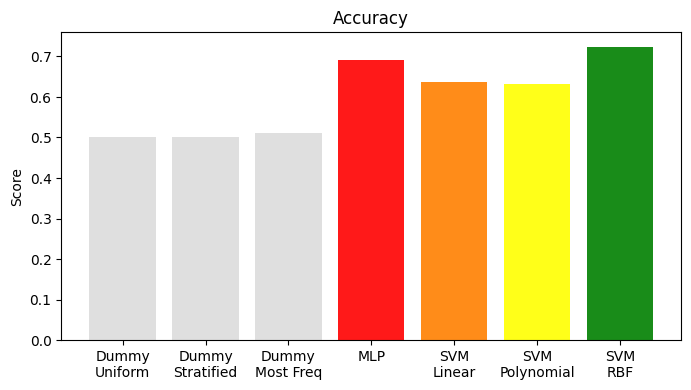

<Figure size 640x480 with 0 Axes>

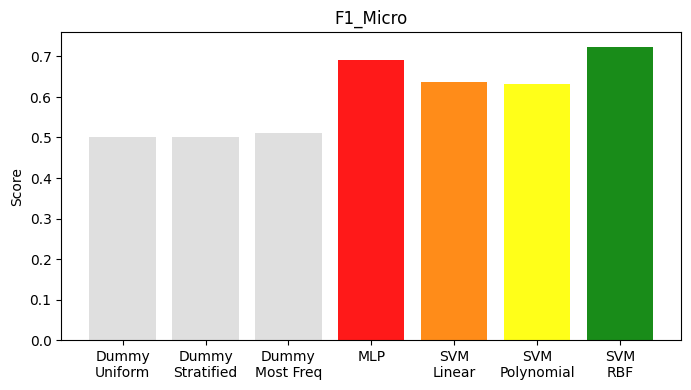

<Figure size 640x480 with 0 Axes>

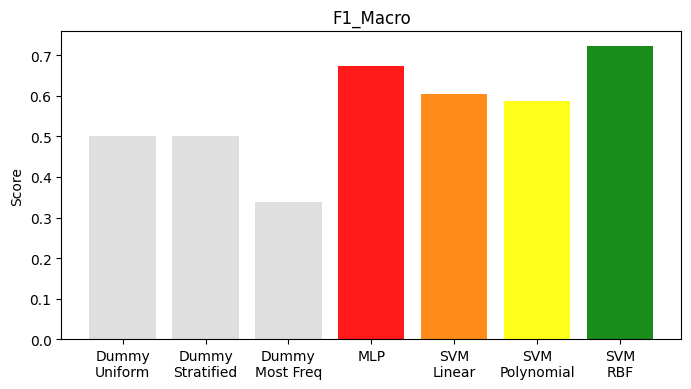

In [ ]:
#Bar Plotting Metric Results
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

classifiers = [ "Dummy\nUniform", "Dummy\nStratified", "Dummy\nMost Freq", "MLP", "SVM\nLinear", "SVM\nPolynomial", "SVM\nRBF"]


y_pos =  np.arange(len(classifiers))
plt.figure(1)
plt.figure(figsize=(8,4))
plt.bar(y_pos, classifiers_accuracy[0:7], align='center', alpha=0.9, color = ['#DCDCDC','#DCDCDC','#DCDCDC','#ff0000','#ff8000','#ffff00','#008000'])
plt.xticks(y_pos, classifiers)
plt.ylabel('Score')
plt.title("Accuracy")

plt.show()

plt.figure(2)
plt.figure(figsize=(8,4))
plt.bar(y_pos, classifiers_f1_micro[0:7], align='center', alpha=0.9, color = ['#DCDCDC','#DCDCDC','#DCDCDC','#ff0000','#ff8000','#ffff00','#008000'])
plt.xticks(y_pos, classifiers)
plt.ylabel('Score')
plt.title("F1_Micro")

plt.show()

plt.figure(3)
plt.figure(figsize=(8,4))
plt.bar(y_pos, classifiers_f1_macro[0:7], align='center', alpha=0.9, color = ['#DCDCDC','#DCDCDC','#DCDCDC','#ff0000','#ff8000','#ffff00','#008000'])
plt.xticks(y_pos, classifiers)
plt.ylabel('Score')
plt.title("F1_Macro")

plt.show()


## Σχολιασμός αποτελεσμάτων:

Παρατηρούμε και από τα παραπάνω διαγράμματα και από τον πίνακα πως τα καλύτερα αποτελέσματα τα πήραμε από τον SVC με kernel='rbf' και δεύτερος καλύτερος έρχεται ο MLP. 

|     |       |        |        |       |        |        |        |
|-----|-------|--------|--------|-------|--------|--------|--------|
|     |Dummy Uniform|Dummy Stratified|Dummy Most Freq|MLP|SVM Linear|SVM Polynomial|SVM RBF|
|accuracy|0.5019742395773765|0.5007216186041445|0.5108515099528905|0.6906843122838549|0.6378563842823298|0.6315388176347249|0.7239059989652261|
|f1_micro|0.5019742395773765|0.5007216186041445|0.5108515099528905|0.6906843122838549|0.6378563842823298| 0.6315388176347249|0.7239059989652262|
|f1_macro|0.5019145525906903|0.5005543746394929|0.33812158679235077|0.673209475798533|0.6058811070996382|0.5883732911370716|0.7238497736793665|

Οι Dummy ταξινομητές έχουν φέρει αποτελέσματα όλοι κοντά στο 50% αυτό είναι λογικό καθώς έχουμε ένα δυαδικό πρόβλημα.
Ο ταξινομητής SCV με default τιμές έχει αυτόματα τον kernel='rbf' ωστώσο αποφασίσαμε να παρουσιάσουμε και τους άλλους δύο για λόγους πληρότητας.

Έχουμε δυαδικό πρόβλημα και αυτό σημαίνει πως μας ενδιαφέρει περισσότερο το f1-micro το οποίο ταυτίζεται με το accuracy.

Τέλος θα ήθελα να σχολιάσω πως επιλέξαμε την μετρική "accuracy" ως πιο αξιόπιστη στην αξιολόγηση του dataset μας. Αυτό έχει να κάνει με την φύση του προβλήματος, καθώς δεν ενδιαφέρει περισσότερο ένα συγκεκριμένο metric. 
Ουτε διάγνωση κάποιας ασθένειας κάνουμε για να χρειαζόμαστε το Recall, δηλαδή να μην χάνουμε συγκεκριμένα τα θετικά αποτελέσματα, ούτε μια οικονομική απόφαση, ώστε να μην θέλουμε να ρισκάρουμε σε περίπτωση λάθους (Precision). Αυτό που θέλουμε είναι να έχουμε ένα μέτρο για την ορθότητα του ταξινομητή καθώς πραγματευόμαστε απλά ένα παιχνίδι. 

# PCA testing

## Ανάλυση σε κύριες συνιστώσες (PCA) 
Στην προσπάθεια να περιορίσουμε τον όγκο δεδομένων που έχουμε να επεξεργαστούμε προσπαθήσαμε να εισάγουμε την ανάλυση pca. <br>
Επιλέξαμε "n_components = 16" καθώς είναι μία μικρή τιμή συγκριτικα με τις 96 κολώνες που είχαμε στην αρχή.<br>
Ήδη παρατηρούμε μία μικρή βελτίωση σε όλους τους εκτιμητές της τάξης του 1%. 

In [ ]:
from sklearn.decomposition import PCA

# Ορίζουμε την PCA και τον τελικό αριθμό features - αριθμό κύριων συνιστωσών
n = 16
pca = PCA(n_components=n)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train.shape)
print(X_train_pca.shape)

X_train = X_train_pca
X_test = X_test_pca
y_train = y_train
y_test = y_test

(87358, 96)
(87358, 16)

(36723, 96)
[[-2.64515312e+03  1.42678423e+04  1.29677728e+02 ... -8.42273519e-01
   1.45359389e+00 -3.40121680e-01]
 [-1.18852012e+04  1.68033720e+03 -3.08013248e+02 ... -2.04512064e+00
   1.29806651e+00 -2.25225160e+00]
 [ 9.17362013e+03  5.58461920e+03  1.65343515e+02 ... -6.04878974e-01
  -6.02108660e-01  1.81536352e-01]
 ...
 [-4.95844088e+02  1.70959864e+04  5.77012122e+01 ... -1.79468468e+00
   1.05754163e+00 -8.74176281e-01]
 [-9.55628864e+03 -4.75419532e+03 -2.46179365e+02 ... -8.29158801e-01
   1.73255396e+00 -5.67582404e-01]
 [-9.24975262e+03  8.52390972e+00  2.56796042e+02 ... -3.47394395e-02
   3.21100298e-01 -5.09083539e-01]]


## PCA (n=16)

In [ ]:
from sklearn.neural_network import MLPClassifier
import time

start_time = time.time()
Mlp = MLPClassifier()
Mlp.fit(X_train, y_train.values.ravel())
print("Fit time: %s seconds" % (time.time() - start_time))
predictions = Mlp.predict(X_train)
print('The predicted array Mlp gave is: ', predictions)
scores = Mlp.score(X_train, y_train)
print('The accuracy score Mlp gave is: ', scores)
print("Total time: %s seconds" % (time.time() - start_time))

Fit time: 65.71870040893555 seconds
The predicted array Mlp gave is:  ['1' '1' '1' ... '0' '0' '0']
The accuracy score Mlp gave is:  0.7015842853545182
Total time: 66.80413365364075 seconds


In [ ]:
from sklearn.svm import LinearSVC
import time

start_time = time.time()
svmLinear = LinearSVC(random_state=0, tol=1e-5)
svmLinear.fit(X_train, y_train.values.ravel()) 
predictions = svmLinear.predict(X_train)
print('The predicted array LinearSVC gave is: ', predictions)
scores = svmLinear.score(X_train, y_train)
print('The accuracy score LinearSVC gave is: ', scores)
print("Total time: %s seconds" % (time.time() - start_time))

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
The predicted array LinearSVC gave is:  ['1' '1' '0' ... '1' '1' '0']
The accuracy score LinearSVC gave is:  0.635522791272694
Total time: 72.39943838119507 seconds


In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
import time

start_time = time.time()
SVM = SVC()
SVM.fit(X_train, y_train.values)  #when baseline kernel = 'rbf'
print("Fit time: %s seconds" % (time.time() - start_time))
predictions = SVM.predict(X_train)
print('The predicted array SVM rbf gave is: ', predictions)
scores = SVM.score(X_train, y_train)
print('The accuracy score SVM rbf gave is: ', scores)
print("Total time: %s seconds" % (time.time() - start_time))

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Fit time: 1381.1660509109497 seconds
The predicted array SVM rbf gave is:  ['1' '1' '1' ... '0' '0' '0']
The accuracy score SVM rbf gave is:  0.726962613612949
Total time: 3581.9989354610443 seconds


# **Βελτιστοποίηση Ταξινομητών - Optimization**

Για τους δύο ταξινομητές βελτιστοποιούμε την επίδοσή τους μέσω των διαδικασιών

* προεπεξεργασίας,
* ορισμού pipelines, και
* εύρεσης βέλτιστων υπερμαραμέτρων με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση

Για την επιλογή μοντέλου θα χρησιμοποιήσουμε συναρτήσεις απο το sklearn και την βιβλιοθήκη βελτιστοποίησης Optuna.

### Sliced Dataset

<h1> Ορισμός του Sliced Dataset </h1>

Το dataset που μας δόθηκε απαιτεί μεγάλους χρόνους υπολογίσμου για την αναζήτηση βέλτιστων υπερπαραμέτρων για τους ταξινομητές που έχουμε στην διάθεση μας(SVM, MLP). Έτσι δοκιμάσαμε, μόνο για το κομάτι της βελτιστοποίησης, να πάρουμε το 1/4 του dataset, διατηρώντας βέβαια το ίδιο frequence στις κλάσεις ώστε να βρούμε "στο περίπου" που κοντά κινούνται οι υπερπαράμετροι ώστε όταν καταλήξουμε σε κάποιες τιμές να τις δοκιμάσουμε στο αρχικό dataset, γλιτώνοντας έτσι σημαντικό χρόνο.

Στους τελικούς υπολογισμούς θα χρησιμοποιήσουμε όλο το dataset για την εύρεση των μετρικών, τα παραπάνω έγιναν για δοκιμές των ταξινομητών με αρκετά μεγαλύτερη ταχύτητα.

Παρακάτω φαίνεται η διαδικασία που ακολουθήσαμε.

-Μεταβλητές του dataset2(sliced) : testedfeatures, testedlabels-

In [ ]:
csgo = pd.read_csv('/content/csgo_round_snapshots.csv')

Class = csgo['round_winner'].tolist()

dataset1=csgo.groupby(Class).apply(pd.DataFrame.sample, frac=0.5098).reset_index(drop=True)
labelsNEW = dataset1.iloc[:, [96]] # τα labels είναι στη 97 κολώνα

dataset2=dataset1.groupby('round_winner').apply(pd.DataFrame.sample, frac=0.5098).reset_index(drop=True)
testlabels = dataset2.iloc[:, [96]] # τα labels είναι στη 97 κολώνα
testfeatures = dataset2.iloc[:, 0:96]


In [ ]:
# manage the Nan values

x=testlabels.replace(to_replace='CT', value='0', regex=True)
testedlabels = x.replace(to_replace='T', value='1', regex=True)

a=testfeatures.replace(to_replace='de_dust2', value='1', regex=True)
b=a.replace(to_replace='de_train', value='2', regex=True)
c=b.replace(to_replace='de_nuke', value='3', regex=True)
d=c.replace(to_replace='de_overpass', value='4', regex=True)
e=d.replace(to_replace='de_vertigo', value='5', regex=True)
f=e.replace(to_replace='de_mirage', value='6', regex=True)
g=f.replace(to_replace='de_inferno', value='7', regex=True)
h=g.replace(to_replace='de_cache', value='8', regex=True)

i=h.replace(to_replace='False', value='0', regex=True)
gam = i.replace(to_replace='True', value='1', regex=True)

testedfeatures = gam.loc[:, (gam!=0).any(axis=0)]

from sklearn.model_selection import train_test_split

# Split our data
X_train, X_test, y_train, y_test = train_test_split(testedfeatures, testedlabels, test_size=0.3)

### Χρησιμες βιβλιοθήκες και αρχικοποιήσεις: 

In [ ]:
# imports and initialization

import time
import numpy as np
import optuna
from statistics import mean
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from warnings import simplefilter
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfTransformer
selector = VarianceThreshold()
standar = StandardScaler()
minmax = MinMaxScaler()
ros = RandomOverSampler()
rus = RandomUnderSampler()
smote = SMOTE()
pca = PCA()


import warnings 
from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)

# Optuna study

Σε μειωμένο πλέον dataset είμαστε σε θέση να λάβουμε ακριβή δεδομένα σε λογικό χρόνο. Παρακάτω βλέπουμε πως έχουμε χρησιμοποιήσει την βιβλιοθήκη βελτιστοποίησης Optuna, δίνοντας της όλες τις υπερπαραμέτρους με τα κατάλληλα εύρη τιμών ωστε να αποφασίσει το σύστημα ποια ακριβώς τιμή θα διαλέξει.


Το **Optuna** έχει σχεδιαστεί ειδικά για μηχανική μάθηση. Είναι ένας black-box optimizer, επομένως χρειάζεται μια αντικειμενική συνάρτηση (objective function). Αυτή η συνάρτηση αποφασίζει πού θα γίνει δειγματοληψία στις επερχόμενες δοκιμές(trials) και επιστρέφει αριθμητικές τιμές (την απόδοση των υπερπαραμέτρων). Χρησιμοποιεί διαφορετικούς αλγόριθμους, όπως αλγόριθμους GridSearch, Random Search, Bayesian και Evolutionary για να βρει τις βέλτιστες τιμές υπερπαραμέτρων.

## MLP (Multi-layer Perceptron classifier)

**Ταξινομητής Perceptron πολλαπλών στρωμάτων.**

Αυτό το μοντέλο βελτιστοποιεί τη συνάρτηση "log-loss" χρησιμοποιώντας LBFGS ή στοχαστική κλίση.

In [ ]:
import optuna
import sklearn.neural_network

def objective_mlp(trial):
    
    n_layers = trial.suggest_int('n_layers', 1, 2)
    layers = []
    for i in range(n_layers): 
        layers.append(trial.suggest_int('n_units_{i}', 1, 200))
        
    activation = trial.suggest_categorical('activation',['identity', 'logistic', 'tanh', 'relu']) 
    solver = trial.suggest_categorical('solver',['sgd','adam'])  #the other one wasn't compatable with 'learning rate'
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-3)
    learning_rate = trial.suggest_categorical('learning_rate',['constant','invscaling','adaptive'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    thr = trial.suggest_float('threshold', 0.0, 0.3)
    n_comp = trial.suggest_int('n_components', 2, 32)

    ## Create Model
    clf = sklearn.neural_network.MLPClassifier(
        hidden_layer_sizes=tuple(layers), 
        activation = activation,
        solver = solver,
        max_iter = max_iter,
        learning_rate = learning_rate,
        alpha = alpha
    )
    
    ## Pipeline
    pipe = Pipeline(steps=[('selector', VarianceThreshold(thr)), 
                           ('scaler', stardarScaler),
                           ('pca', PCA(n_comp)), 
                           ('clf', clf)
                          ], memory = 'tmp')
    
    #CV
    cv_results = cross_validate(pipe, X_train, y_train.values.ravel(), n_jobs=-1, cv=5)
    accuracy = mean(cv_results['test_score'])
    
    return accuracy

study_mlp = optuna.create_study(study_name='mlp', direction='maximize')
study_mlp.optimize(objective_mlp, n_trials=15)

print("\nBest Params : {}".format(study_mlp.best_params))
print("Best Accuracy : {}".format(study_mlp.best_value))

[I 2021-12-03 02:40:05,877] A new study created in memory with name: mlp
[I 2021-12-03 02:44:25,091] Trial 0 finished with value: 0.745745258742435 and parameters: {'n_layers': 2, 'n_units_{i}': 70, 'activation': 'relu', 'solver': 'sgd', 'alpha': 2.6101603952164602e-05, 'learning_rate': 'adaptive', 'max_iter': 372, 'threshold': 0.017095904175473707, 'n_components': 29}. Best is trial 0 with value: 0.745745258742435.
[I 2021-12-03 02:45:36,363] Trial 1 finished with value: 0.7239211598947285 and parameters: {'n_layers': 2, 'n_units_{i}': 14, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001116502386044148, 'learning_rate': 'invscaling', 'max_iter': 294, 'threshold': 0.14010287362496163, 'n_components': 4}. Best is trial 0 with value: 0.745745258742435.
[I 2021-12-03 02:50:23,050] Trial 2 finished with value: 0.7281423470864835 and parameters: {'n_layers': 1, 'n_units_{i}': 100, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00018562143519048826, 'learning_rate': 'constant', 'm


Best Params : {'n_layers': 1, 'n_units_{i}': 155, 'activation': 'relu', 'solver': 'sgd', 'alpha': 1.018517103336598e-05, 'learning_rate': 'adaptive', 'max_iter': 613, 'threshold': 0.01747666380468545, 'n_components': 32}
Best Accuracy : 0.7510891836313435


## SVC (C-Support Vector Classification)

**Ταξινόμηση διανυσμάτων C-Support.**
Η υλοποίηση βασίζεται στο libsvm. Ο χρόνος προσαρμογής κλιμακώνεται τουλάχιστον τετραγωνικά με τον αριθμό των δειγμάτων και μπορεί να είναι μη πρακτικός πέρα από δεκάδες χιλιάδες δείγματα. Για μεγάλα σύνολα δεδομένων, εξετάστε το ενδεχόμενο χρήσης LinearSVC ή SGDClassifier, πιθανώς μετά από μετασχηματιστή Nystroem.

Ο χειρισμός της υποστήριξης πολλαπλών τάξεων γίνεται σύμφωνα με ένα σχήμα "one-vs-one".

In [ ]:
import optuna
import sklearn
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC 
from sklearn.model_selection import cross_validate
from statistics import mean
import time
import sklearn

def objectiveLinearSVM(trial):

    C = trial.suggest_float('C', 1.0, 10.0)
    loss = trial.suggest_categorical('loss',['hinge', 'squared_hinge'])
    tol = trial.suggest_loguniform('tol', 1e-06, 1e-03)
    thr = trial.suggest_float('threshold', 0.0, 0.3)
    n_comp = trial.suggest_int('n_components', 2, 32)
 
    ## Create Model
    clf = sklearn.svm.LinearSVC(
        C = C,
        loss = loss,
        tol = tol
    )
    
    ## Pipeline
    pipe = Pipeline(steps=[('selector', VarianceThreshold(thr)), 
                           ('scaler', StandardScaler()),
                           ('pca', PCA(n_comp)), 
                           ('clf', clf)
                          ], memory = 'tmp')
    
    
    ## Cross Validation
    cv_results = cross_validate(pipe, X_train, y_train.values.ravel(), n_jobs=-1, cv=5)
    accuracy = mean(cv_results['test_score'])
    
    return accuracy

study_linear = optuna.create_study(study_name='linear', direction='maximize')
study_linear.optimize(objectiveLinearSVM, n_trials=15)

print("\nBest Params : {}".format(study_linear.best_params))
print("Best Accuracy : {}".format(study_linear.best_value))

[I 2021-12-03 03:28:20,110] A new study created in memory with name: linear
[I 2021-12-03 03:29:00,816] Trial 0 finished with value: 0.7399524707035947 and parameters: {'C': 5.2268518218053455, 'loss': 'squared_hinge', 'tol': 2.7401955144488776e-06, 'threshold': 0.2594022062155827, 'n_components': 14}. Best is trial 0 with value: 0.7399524707035947.
[I 2021-12-03 03:29:18,895] Trial 1 finished with value: 0.7443081565068519 and parameters: {'C': 4.101837734477755, 'loss': 'hinge', 'tol': 5.8693794578212094e-05, 'threshold': 0.2748040607931096, 'n_components': 15}. Best is trial 1 with value: 0.7443081565068519.
[I 2021-12-03 03:29:34,000] Trial 2 finished with value: 0.7205531787321978 and parameters: {'C': 1.4120298249005274, 'loss': 'hinge', 'tol': 0.00016738220130478796, 'threshold': 0.25374737406783676, 'n_components': 4}. Best is trial 1 with value: 0.7443081565068519.
[I 2021-12-03 03:30:03,508] Trial 3 finished with value: 0.7354168483863444 and parameters: {'C': 7.1356376799372


Best Params : {'C': 3.566241113545705, 'loss': 'squared_hinge', 'tol': 1.2084788502414471e-05, 'threshold': 0.23246948964631475, 'n_components': 29}
Best Accuracy : 0.7443531103837506


## LinearSVC (Linear Support Vector Classification)

**Γραμμική Ταξινόμηση Διανυσμάτων Υποστήριξης**
Παρόμοιο με το SVC με παράμετρο kernel='linear', αλλά υλοποιείται με όρους liblinear παρά libsvm, επομένως έχει μεγαλύτερη ευελιξία στην επιλογή των κυρώσεων και των συναρτήσεων απώλειας και θα πρέπει να κλιμακώνεται καλύτερα σε μεγάλους αριθμούς δειγμάτων.

In [ ]:
import optuna
import sklearn
from sklearn.svm import SVC # "Support vector classifier"
import time


# max_iter ξεκινήσαμε με 100-500,ομως έχει πολύ κακα αποτελέμστα φτάσαμε να βάλουμε 20.000 μέχρι 30.000 μήπως βελτιωθεί 
def objectiveSVC(trial):
    
    kernel = trial.suggest_categorical('kernel',['poly','rbf'])
    C = trial.suggest_float('C', 1.0, 10.0)
    degree = trial.suggest_int('degree', 0, 4)
    gamma = trial.suggest_categorical('gamma',['scale', 'auto'])
    tol = trial.suggest_loguniform('tol', 1e-06, 1e-03)
    max_iter = trial.suggest_int('max_iter', 20000, 30000)
    thr = trial.suggest_float('threshold', 0.0, 0.3)
    n_comp = trial.suggest_int('n_components', 2, 32)

    ## Create Model
    clf = SVC(
        kernel = kernel,
        C = C,
        degree = degree,
        gamma = gamma,
        tol = tol,
        max_iter = max_iter
    )

    ## Pipeline
    pipe = Pipeline(steps=[('selector', VarianceThreshold(thr)), 
                           ('scaler', StandardScaler()),
                           ('pca', PCA(n_comp)), 
                           ('clf', clf)
                          ], memory = 'tmp')
    
    #CV
    cv_results = cross_validate(pipe, X_train, y_train.values.ravel(), n_jobs=-1, cv=5)
    accuracy = mean(cv_results['test_score'])
    
    return accuracy


studySVC = optuna.create_study(study_name="SVC [poly, rbf]",direction='maximize')
studySVC.optimize(objectiveSVC, n_trials=15)


print("\nBest Params : {}".format(studySVC.best_params))
print("Best Accuracy : {}".format(studySVC.best_value))

[I 2021-12-03 03:35:58,654] A new study created in memory with name: SVC [poly, rbf]
[I 2021-12-03 03:36:27,770] Trial 0 finished with value: 0.5728604631862739 and parameters: {'kernel': 'poly', 'C': 4.383697363468647, 'degree': 3, 'gamma': 'auto', 'tol': 3.550632751444633e-05, 'max_iter': 20370, 'threshold': 0.18407355133771042, 'n_components': 4}. Best is trial 0 with value: 0.5728604631862739.
[I 2021-12-03 03:37:54,512] Trial 1 finished with value: 0.7329019925821061 and parameters: {'kernel': 'rbf', 'C': 2.2772937319037645, 'degree': 0, 'gamma': 'scale', 'tol': 0.0002019014957189576, 'max_iter': 29463, 'threshold': 0.1415709465390832, 'n_components': 8}. Best is trial 1 with value: 0.7329019925821061.
[I 2021-12-03 03:39:47,102] Trial 2 finished with value: 0.7368988238278942 and parameters: {'kernel': 'poly', 'C': 9.024601285355939, 'degree': 2, 'gamma': 'scale', 'tol': 4.2024571093406794e-05, 'max_iter': 27177, 'threshold': 0.2405409046135868, 'n_components': 30}. Best is trial


Best Params : {'kernel': 'rbf', 'C': 3.6504467106807534, 'degree': 2, 'gamma': 'scale', 'tol': 1.0218392091131985e-06, 'max_iter': 26744, 'threshold': 0.058106670041511044, 'n_components': 30}
Best Accuracy : 0.7624051977894954


## Δοκιμή με διάφορες συναρτήσεις κανονικοποίησης (Scaler)

Στα παραπάνω έχουμε χρησιμοποιήσει παντού Standar Scaler γιατί η συνάρτηση objective είχε δυσκολία να επεξεργαστεί πραπάνω από μία συνάρτηση κανονικοποίησης. Ωστώσο δικιμάσαμε να τρέξουμε κάποια trials για να βεβαιωθούμε πως πραγματι το accuracy δεν επηρεάζεται σημαντικά. Αυτό που θα παρατηρίσουμε είναι ότι ο ταξινομητής MLP προτιμάει να διαλέγει MinMax Scaler αντί του Standar με αποτελέσματα αρκετά κοντινά αλλό όχι αμελητέα. 
>Έτσι στην τελική μας απόφαση θα δόσουμε στον MLP συνάρτηση κανονικοποίησης "MinMax" ενώ στον SVC "Standar". 

In [ ]:
import optuna
import sklearn.neural_network

def objective_mlp(trial):
    
    n_layers = trial.suggest_int('n_layers', 1, 2)
    layers = []
    for i in range(n_layers): 
        layers.append(trial.suggest_int('n_units', 1, 200))
        
    activation = trial.suggest_categorical('activation',['identity', 'logistic', 'tanh', 'relu']) 
    solver = trial.suggest_categorical('solver',['sgd','adam'])  #the other one wasn't compatable with 'learning rate'
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-3)
    learning_rate = trial.suggest_categorical('learning_rate',['constant','invscaling','adaptive'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    threshold = trial.suggest_float('threshold', 0.0, 0.3)
    n_components = trial.suggest_int('n_components', 2, 32)
    scaler = trial.suggest_categorical('scaler',['standard', 'minmax'])

    ## Create Model
    clf = sklearn.neural_network.MLPClassifier(
        hidden_layer_sizes=tuple(layers), 
        activation = activation,
        solver = solver,
        max_iter = max_iter,
        learning_rate = learning_rate,
        alpha = alpha
    )

    ## Pipeline
    if scaler == 'standard': 
      pipe = Pipeline(steps=[('selector', VarianceThreshold(threshold)), ('scaler', StandardScaler()), 
                            ('pca', PCA(n_components)), ('clf', clf)], memory = 'tmp')
    elif scaler == 'minmax': 
      pipe = Pipeline(steps=[('selector', VarianceThreshold(threshold)), ('scaler', MinMaxScaler()),
                            ('pca', PCA(n_components)), ('clf', clf)], memory = 'tmp')
    
    #CV
    cv_results = cross_validate(pipe, X_train, y_train.values.ravel(), n_jobs=-1, cv=5)
    accuracy = mean(cv_results['test_score'])
    
    return accuracy

study_mlp = optuna.create_study(study_name='mlp', direction='maximize')
study_mlp.optimize(objective_mlp, n_trials=15)

print("\nBest Params : {}".format(study_mlp.best_params))
print("Best Accuracy : {}".format(study_mlp.best_value))

[I 2021-12-03 04:49:26,144] A new study created in memory with name: mlp
[I 2021-12-03 04:50:04,262] Trial 0 finished with value: 0.7102704684591278 and parameters: {'n_layers': 1, 'n_units': 139, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0001281551788225068, 'learning_rate': 'constant', 'max_iter': 235, 'threshold': 0.2491808121401386, 'n_components': 3, 'scaler': 'standard'}. Best is trial 0 with value: 0.7102704684591278.
[I 2021-12-03 04:51:26,964] Trial 1 finished with value: 0.7418383049988448 and parameters: {'n_layers': 2, 'n_units': 122, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 4.658756596482948e-05, 'learning_rate': 'constant', 'max_iter': 461, 'threshold': 0.1800639777972532, 'n_components': 15, 'scaler': 'minmax'}. Best is trial 1 with value: 0.7418383049988448.
[I 2021-12-03 04:51:54,097] Trial 2 finished with value: 0.6125586288603688 and parameters: {'n_layers': 2, 'n_units': 78, 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00047127023745614495, '


Best Params : {'n_layers': 1, 'n_units': 17, 'activation': 'identity', 'solver': 'adam', 'alpha': 0.00014780721393394336, 'learning_rate': 'adaptive', 'max_iter': 685, 'threshold': 0.2983501167648002, 'n_components': 32, 'scaler': 'minmax'}
Best Accuracy : 0.744398114679982


In [ ]:
import optuna
import sklearn.neural_network
from sklearn.svm import SVC 


def objective_svc(trial):
    
    kernel = trial.suggest_categorical('kernel',['poly','rbf'])
    C = trial.suggest_float('C', 1.0, 10.0)
    degree = trial.suggest_int('degree', 0, 4)
    gamma = trial.suggest_categorical('gamma',['scale', 'auto'])
    tol = trial.suggest_loguniform('tol', 1e-06, 1e-03)
    max_iter = trial.suggest_int('max_iter', 20000, 30000)
    threshold = trial.suggest_float('threshold', 0.0, 0.3)
    n_components = trial.suggest_int('n_components', 2, 32)
    scaler = trial.suggest_categorical('scaler',['standard', 'minmax'])

    ## Create Model
    clf = sklearn.svm.SVC(
        kernel = kernel,
        C = C,
        degree = degree,
        gamma = gamma,
        tol = tol,
        max_iter = max_iter
    )

    ## Pipeline
    if scaler == 'standard': 
      pipe = Pipeline(steps=[('selector', VarianceThreshold(threshold)), ('scaler', StandardScaler()), 
                            ('pca', PCA(n_components)), ('clf', clf)], memory = 'tmp')
    elif scaler == 'minmax': 
      pipe = Pipeline(steps=[('selector', VarianceThreshold(threshold)), ('scaler', MinMaxScaler()),
                            ('pca', PCA(n_components)), ('clf', clf)], memory = 'tmp')
    
    #CV
    cv_results = cross_validate(pipe, X_train, y_train.values.ravel(), n_jobs=-1, cv=5)
    accuracy = mean(cv_results['test_score'])
    
    return accuracy

study_svc = optuna.create_study(study_name='svc', direction='maximize')
study_svc.optimize(objective_svc, n_trials=15)

print("\nBest Params : {}".format(study_svc.best_params))
print("Best Accuracy : {}".format(study_svc.best_value))

[I 2021-12-03 04:23:03,637] A new study created in memory with name: svc
[I 2021-12-03 04:25:08,587] Trial 0 finished with value: 0.733216599133332 and parameters: {'kernel': 'rbf', 'C': 6.3446873503999335, 'degree': 1, 'gamma': 'auto', 'tol': 1.9307837393050265e-06, 'max_iter': 23310, 'threshold': 0.03608741295814844, 'n_components': 7, 'scaler': 'standard'}. Best is trial 0 with value: 0.733216599133332.
[I 2021-12-03 04:27:15,962] Trial 1 finished with value: 0.7488437687402357 and parameters: {'kernel': 'rbf', 'C': 8.144581346621397, 'degree': 3, 'gamma': 'auto', 'tol': 0.00010280243805358616, 'max_iter': 25993, 'threshold': 0.25098711508731164, 'n_components': 30, 'scaler': 'minmax'}. Best is trial 1 with value: 0.7488437687402357.
[I 2021-12-03 04:28:55,087] Trial 2 finished with value: 0.509138262011322 and parameters: {'kernel': 'poly', 'C': 8.854404450088577, 'degree': 0, 'gamma': 'scale', 'tol': 7.644383312723978e-05, 'max_iter': 26343, 'threshold': 0.08860854376923452, 'n_co


Best Params : {'kernel': 'rbf', 'C': 4.4052317984558735, 'degree': 0, 'gamma': 'auto', 'tol': 0.00034489493794171095, 'max_iter': 20979, 'threshold': 0.047696950584428556, 'n_components': 24, 'scaler': 'standard'}
Best Accuracy : 0.753199656220823


# Αποτελέσματα

Εδώ ορίζουμε μία συνάρτηση η οποία παίρνει σαν ορίσματα τον ταξινομητή, το split των δεδομένων, τις παραμέτρους και έναν αυξον αριθμό δοκιμής ωστε να κάνει fit τον εκτιμητή με το σωστό pipeline και να επιστρέψει το accuracy. 
Σε όλη αυτή η διαδικασία θα χρησιμοποιήσουμε δεδομένα για τις καλύτερες υπερπαραμέτρους που μας έδωσε το Optuna και ολόκληρο το dataset για να αξιολογήσουμε σωστά τον εκτιμητή. 

In [ ]:
def best_clf(clf, X_train, y_train, X_test, y_test, b):
    start_time = time.time()
    
    if clf == "MLP": pipe = Pipeline(steps=[('selector', VarianceThreshold(b['threshold'])), 
                           ('scaler', minmax),  # είχε αποφασιστεί νωρίτερα 
                           ('pca', PCA(b['n_components'])), 
                           ('clf', MLPClassifier(
                                            hidden_layer_sizes=(b['n_layers'], b['n_units']), 
                                            activation = b['activation'],
                                            solver = b['solver'],
                                            max_iter = b['max_iter'],
                                            learning_rate = b['learning_rate'],
                                            alpha = b['alpha']  ) )
                          ], memory = 'tmp')

    elif clf == "LinearSVC": pipe = Pipeline(steps=[('selector', VarianceThreshold(b['threshold'])),
                                   ('scaler', standar), 
                                   ('pca', PCA(b['n_components'])), 
                                   ('clf', LinearSVC(C = b['C'], loss = b['loss'], tol = b['tol']))
                                  ], memory = 'tmp')


    elif clf == "SVC":  pipe = Pipeline(steps=[('selector', VarianceThreshold(b['threshold'])),
                               ('scaler', standar),  # είχε αποφασιστεί νωρίτερα 
                               ('pca', PCA(b['n_components'])), 
                               ('clf', SVC(
                                           kernel = b['kernel'],
                                           C = b['C'], 
                                           degree = b['degree'],
                                           gamma = b['gamma'],
                                           max_iter = b['max_iter'] ) )
                              ], memory = 'tmp')

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    print("Classifier ", clf)
    print("Fit & Predict: %s seconds" % (time.time() - start_time))
    print(classification_report(y_test, preds))
    print("\naccuracy")
    accuracy = accuracy_score(y_test, preds)
    print(accuracy, "\n")
    print("f1 micro")
    f1_micro = precision_recall_fscore_support(y_test, preds, average='micro')
    print(f1_micro, "\n")
    return accuracy

<h2><b>Βελτιστοποίηση του MLP Classifier </b></h2>

Oι παράμετροι με τις οποίες πειραματιστήκαμε ήταν οι εξής:

*   **hidden layer sizes**: τα μεγέθη (πλήθη νευρώνων) των κρυμμένων επιπέδων νευρώνων του MLP.
Οι τιμές που δοκιμάστηκαν ήταν 1 εώς 2 επίπεδα ενώ οι νευρώνες στο εύρος [1, 200].
*   **activation**: η activation funtion του κρυμμένου επιπέδου νευρώνων. 
Οι τιμές που δοκιμάστηκαν ήταν οι εξής: [identity, logistic, tanh, relu].
*   **solver**: ο solver για βελτιστοποίηση βαρών.
Οι τιμές που δοκιμάστηκαν ήταν οι εξής: [sgd, adam].
*   **alpha**: L2 penalty parameter. Οι τιμές που δοκιμάστηκαν ήταν στο εύρος: [1e-5, 1e-3].
*   **learning rate**: Οι τιμές που δοκιμάστηκαν ήταν οι εξής: [constant, invscaling, adaptive]
*   **max iterations**: Μέγιστος αριθμός επαναλήψεων. Ο solver επαναλαμβάνει τη διαδικασία έως τη σύγκλιση (καθορίζεται από το «tol») ή αυτόν τον αριθμό επαναλήψεων. Οι τιμές που δοκιμάστηκαν ήταν στο εύρος: [200, 1000]


Πέρα από τις υπερπαραμέτρους του MLP χρησιμοποιήσαμε και pipeline δοκιμάζοντας σε αυτό τα εξής:

* Μείωση διαστάσεων εισόδου με επιλογή χαρακτηριστικών (**VarianceThreshold**), με τιμές στο εύρος: [0.0, 0.3]
* Ανάλυση σε κύριες συνιστώσες (**PCA**), με τιμές στο εύρος: [2, 32]

>Με την βελτιστοποίηση πετύχαμε σκορ στο train set ~75%, παρουσιάζει βελτίωση 6% από τον αρχικό που είχε ~69%.

Ο καλύτερος ταξινομητής βρέθηκε για τις εξής τιμές των παραμέτρων: 

In [ ]:
BestParamsMLP = {'n_layers': 1, 'n_units': 155, 'activation': 'relu', 'solver': 'sgd', 'alpha': 1.018517103336598e-05, 'learning_rate': 'adaptive', 'max_iter': 613, 'threshold': 0.01747666380468545, 'n_components': 32}
# Accuracy : 0.7510891836313435 

best_accuracy_mlp = best_clf("MLP", X_train, y_train, X_test, y_test, BestParamsMLP)

Classifier  MLP
Fit & Predict: 85.51825475692749 seconds
              precision    recall  f1-score   support

           0       0.73      0.77      0.75     17973
           1       0.77      0.73      0.75     18750

    accuracy                           0.75     36723
   macro avg       0.75      0.75      0.75     36723
weighted avg       0.75      0.75      0.75     36723


accuracy
0.7496391906979277 

f1 micro
(0.7496391906979277, 0.7496391906979277, 0.7496391906979277, None) 



<h2><b>Βελτιστοποίηση του LinearSVC Classifier </b></h2>

Οι υπερπαράμετροι με τις οποίες πειραματιστήκαμε για την βελτιστοποίηση ήταν οι εξής:

  * **c**: Παράμετρος κανονικοποίσης. Το βάρος της κανονικοποίησης είναι αντιστρόφως ανάλογο με το C. Οι τιμές που δοκιμάστηκαν ήταν στο εύρος: [1.0, 10.0]
  * **los**: loss function ['hinge', 'squared_hinge'].

  * **tol**: "Ανεκτικότητα" για το κριτηρίο ολοκήρωσης του αλγορίθμου του SVM. Οι τιμές που δοκιμάστηκαν ήταν στο εύρος: [1e-06, 1e-03]


Πέρα από τις υπερπαραμέτρους του LinearSVC χρησιμοποιήσαμε και pipeline δοκιμάζοντας σε αυτό τα εξής:

* Μείωση διαστάσεων εισόδου με επιλογή χαρακτηριστικών (**VarianceThreshold**), με τιμές στο εύρος: [0.0, 0.3]
* Ανάλυση σε κύριες συνιστώσες (**PCA**), με τιμές στο εύρος: [2, 32]


>Με σκορ στο train set ~74% παρουσιάζει εντυπωσιακή βελτίωση της ταξης του 11% από τον αρχικό που είχε ~63%. 

Ο καλύτερος ταξινομητής βρέθηκε για τις εξής τιμές των παραμέτρων: 

In [ ]:
BestParamsLinearSVC = {'C': 3.566241113545705, 'loss': 'squared_hinge', 'tol': 1.2084788502414471e-05, 'threshold': 0.23246948964631475, 'n_components': 29}
# Accuracy : 0.7443531103837506  

best_accuracy_linear = best_clf("LinearSVC", X_train, y_train, X_test, y_test, BestParamsLinearSVC, 1)

Classifier  LinearSVC  trial :  1
Fit & Predict: 65.16424703598022 seconds
              precision    recall  f1-score   support

           0       0.73      0.75      0.74     17930
           1       0.76      0.74      0.75     18793

    accuracy                           0.74     36723
   macro avg       0.74      0.74      0.74     36723
weighted avg       0.74      0.74      0.74     36723


accuracy
0.7429403915802086 

f1 micro
(0.7429403915802086, 0.7429403915802086, 0.7429403915802086, None) 



0.7429403915802086

<h2><b>Βελτιστοποίηση του SVM Classifier </b></h2>

Οι υπερπαράμετροι με τις οποίες πειραματιστήκαμε για την βελτιστοποίηση ήταν οι εξής:

* **kernel**: Καθορίζει τον τύπο πυρήνα που θα χρησιμοποιηθεί στον αλγόριθμο. Οι τιμές που δοκιμάστηκαν ήταν "rbf" και "poly"(πολυωνυμικός).

* **c**: Παράμετρος κανονικοποίσης. Το βάρος της κανονικοποίησης είναι αντιστρόφως ανάλογο με το C. Οι τιμές που δοκιμάστηκαν ήταν στο εύρος: [1.0, 10.0]

* **degree**: βαθμός της πολυωνυμικής συνάρτησης πυρήνα («poly»). Αγνοείται από όλους τους άλλους "kernel". Οι τιμές που δοκιμάτηκαν ήταν στο εύρος: [0,  4] 

* **gamma**: η παράμετρος gamma καθορίζει πόσο μακριά φτάνει η επίδραση ενός μόνο παραδείγματος εκπαίδευσης, με τις χαμηλές τιμές να σημαίνουν μακριά και τις υψηλές τιμές να σημαίνουν κοντά. Οι τιμές που δοκιμάστηκαν ήταν οι εξής: 
'scale' και 'auto'

* **tol:** "Ανεκτικότητα" για το κριτηρίο ολοκήρωσης του αλγορίθμου του SVM. Οι τιμές που δοκιμάστηκαν ήταν στο εύρος: [1e-06, 1e-03]


Πέρα από τις υπερπαραμέτρους του LinearSVC χρησιμοποιήσαμε και pipeline δοκιμάζοντας σε αυτό τα εξής:

* Μείωση διαστάσεων εισόδου με επιλογή χαρακτηριστικών (**VarianceThreshold**), με τιμές στο εύρος: [0.0, 0.3]
* Ανάλυση σε κύριες συνιστώσες (**PCA**), με τιμές στο εύρος: [2, 32]

>Με την βελτιστοποίηση στο train set πετύχαμε σκορ ~76%, παρουσιάζει βελτίωση 4% από τον αρχικό που είχε ~72%.
Ενώ ο καλύτερος ταξινομητής που βρέθηκε, στο test set και στο σύνολο των δεδομένων δίνει accuracy 80%. 

Παρακάτω οι υπερπαράμετροι: 

In [ ]:
BestParamsSVC = {'kernel': 'rbf', 'C': 3.6504467106807534, 'degree': 2, 'gamma': 'scale', 'tol': 1.0218392091131985e-06, 'max_iter': 26744, 'threshold': 0.058106670041511044, 'n_components': 30}
# Accuracy : 0.7624051977894954

best_accuracy_svc = best_clf("SVC", X_train, y_train, X_test, y_test, BestParamsSVC)

Classifier  SVC
Fit & Predict: 636.3250226974487 seconds
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     17973
           1       0.82      0.78      0.80     18750

    accuracy                           0.80     36723
   macro avg       0.80      0.80      0.80     36723
weighted avg       0.80      0.80      0.80     36723


accuracy
0.8003431092231027 

f1 micro
(0.8003431092231027, 0.8003431092231027, 0.8003431092231027, None) 



## Διαγράμματα και Συνολικά Αποτελέσματα: 

In [ ]:
### import numpy as np
import matplotlib.pyplot as plt

# plotting
def print_plot(class1,class2):
    N = 3  # number of groups
    ind = np.arange(N)  # group positions
    width = 0.3  # bar width

    fig, ax = plt.subplots()

    # bars for classifier 1-6
    p1 = ax.bar(ind, np.hstack(([class1])), width, color="green", edgecolor="k")
    p2 = ax.bar(
        ind + width,
        np.hstack(([class2])),
        width,
        color="lightgreen",
        edgecolor="k",
    )


    # plot annotations
    ax.set_xticks(ind + width)
    ax.set_xticklabels(
        [
            "MLP",
            "Linear SVC",
            "SVC(rbf)"
        ],
        rotation=0,
        ha="right",
    )
    plt.ylim([0, 1])
    plt.title("Out of the Box & Optimized \nEstimator's Accuracy:")
    plt.legend([p1[0], p2[0]], ["out of the box", "optimized"], loc="upper left")
    plt.show()

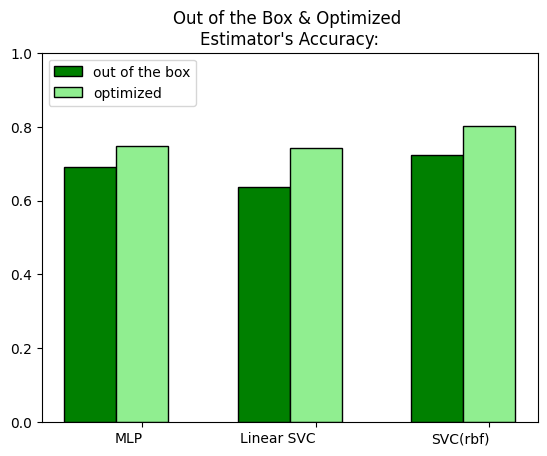

In [ ]:
optimized = [best_accuracy_mlp, best_accuracy_linear, best_accuracy_svc]
out_of_the_box = [ classifiers_accuracy[3], classifiers_accuracy[4], classifiers_accuracy[6] ] 

print_plot(out_of_the_box, optimized)

Παρατηρώντας τα συνολικά αποτελέσματα βλέπουμε πως όλοι οι αλγόριθμοι έχουν φέρει πολύ καλύτερο accuracy μετά την βελτιστοποίηση. Να σημειωθεί πως η βελτιστοποίηση έγινε σε μειωμένο (sliced) dataset ενώ παραπάνω τρέξαμε τους εκτιμητές με τις επιλεγμένες υπερπαραμέτρους στο ολόκληρο. Αυτός είναι και ο λόγος που εκτιμητές όπως ο SVC έχουν δώσει τόσο καλό accuracy στο test set γιατί είχε περισσότερα δεδομένα από τα οποία μπορούσε να εκπαιδευτεί. 
 
 
|     |       |        |        |       |
|-----|-------|--------|--------|-------|
|     |MLP|SVM Linear|SVM RBF|
|out of the box|0.6906843122838549|0.6378563842823298|0.7239059989652261|
|optimized|0.748849494866977|0.7429403915802086 |0.8003431092231027|
 
 
Καλύτερα αποτελέσματα έχει φέρει με διαφορά ο SVC ωστόσο δεν πρέπει να παραβλέπουμε την χρονική επιβάρυνση που έχει η χρήση του. Από την άλλη πλευρά ο MLP έχει δώσει αξιόλογα αποτελέσματα σε λογικούς χρόνους και αυτό είναι κάτι που θα μπορούσε μας κάνει να τον επιλέξουμε. 

Ο Linear SVC δείχνει μεγάλη πρόοδο και ίσως να μας φαινόταν χρήσιμος όμως πάλι μένει πίσω συγκριτικά με τους άλλους δύο. 

Ο Polynomial SVC δεν μας απασχόλησε καθώς η συνάρτηση βελτιστοποίησης της optuna δεν τον επέλεξε στην πλειοψηφία των δοκιμών. 

>Τέλος να σημειωθεί πως σε αναζητήσεις που κάναμε αλλά και στο ίδιο το kaggle το συγκεκριμένο dataset CS:GO για αναζήτηση αποτελέσματος στην μάχη (του παιχνιδιού) έχουν καταφέρει να πετύχουν accuracy μέχρι 81,56%. Αυτό σημαίνει πως ο SVC σχεδόν άγκιξε αυτην την τιμή ενώ οι άλλοι δύο εκτιμητές κατάφεραν να την πλησιάσουν σημαντικά.  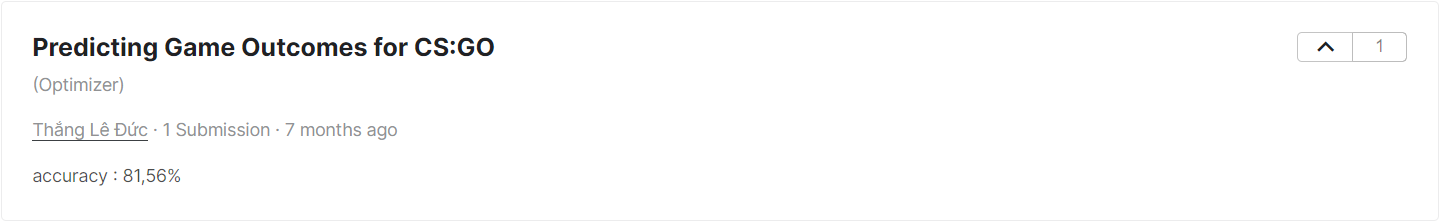